# Image Compression with SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img 

Image shape:  (220, 220, 3)


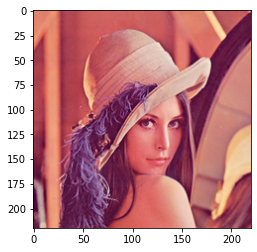

In [2]:
image = img.imread('lenna.png') 
plt.imshow(image)
print("Image shape: ", image.shape)

In [3]:
# Split color channels
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]

# Apply SVD for each channel
u1, s1, vh1 = np.linalg.svd(image_r, full_matrices=True)
u2, s2, vh2 = np.linalg.svd(image_g, full_matrices=True)
u3, s3, vh3 = np.linalg.svd(image_b, full_matrices=True)

print("u1.shape:", u1.shape)
print("s1.shape:", s1.shape)
print("vh1.shape:", vh1.shape)

u1.shape: (220, 220)
s1.shape: (220,)
vh1.shape: (220, 220)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


u1_new.shape: (220, 40)
s1_new.shape: (40,)
vh1_new.shape: (40, 220)


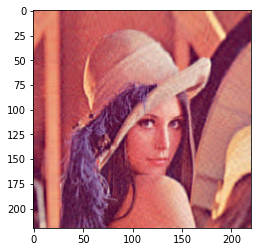

In [4]:
N = 40 # <== Set between 1 to 220. We will trim u,s,vh arrays according to this value.

# Trim Red
u1_new = u1[:,:N]
s1_new = s1[:N]
vh1_new = vh1[:N,:]

# Trim Green
u2_new = u2[:,:N]
s2_new = s2[:N]
vh2_new = vh2[:N,:]

# Trim Blue
u3_new = u3[:,:N]
s3_new = s3[:N]
vh3_new = vh3[:N,:]

print("u1_new.shape:", u1_new.shape)
print("s1_new.shape:", s1_new.shape)
print("vh1_new.shape:", vh1_new.shape)

# Reconstruct color channels according to trimmed arrays
r_new = np.dot(u1_new * s1_new, vh1_new)
g_new = np.dot(u2_new * s2_new, vh2_new)
b_new = np.dot(u3_new * s3_new, vh3_new)

# Stack color channels
new_image = np.stack((r_new, g_new, b_new), axis=2)

plt.imshow(new_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


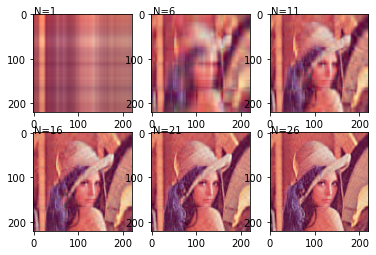

In [5]:
def svd_compression(image, N):
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    image_b = image[:,:,2]

    u1, s1, vh1 = np.linalg.svd(image_r, full_matrices=True)
    u2, s2, vh2 = np.linalg.svd(image_g, full_matrices=True)
    u3, s3, vh3 = np.linalg.svd(image_b, full_matrices=True)
    
    u1_new = u1[:,:N]
    s1_new = s1[:N]
    vh1_new = vh1[:N,:]
    u2_new = u2[:,:N]
    s2_new = s2[:N]
    vh2_new = vh2[:N,:]
    u3_new = u3[:,:N]
    s3_new = s3[:N]
    vh3_new = vh3[:N,:]
    
    r_new = np.dot(u1_new * s1_new, vh1_new)
    g_new = np.dot(u2_new * s2_new, vh2_new)
    b_new = np.dot(u3_new * s3_new, vh3_new)
    
    return np.stack((r_new, g_new, b_new), axis=2)


fig=plt.figure()
for i in range(6):
    N = i*5+1
    new_image = svd_compression(image,N)
    fig.add_subplot(2,3,i+1)
    plt.text(2, 0.65, "N="+str(N))
    plt.imshow(new_image)

# Reference
- http://timbaumann.info/svd-image-compression-demo/